In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch.autograd import Variable

from utils import plot_omniglot_pairs
from data_loader import get_train_valid_loader, get_test_loader

%load_ext autoreload
%autoreload 2

In [2]:
data_dir = './data/'
batch_size = 32

In [5]:
train_loader, valid_loader = get_train_valid_loader(data_dir, batch_size, False)
test_loader = get_test_loader(data_dir)

In [6]:
print("Train: {:,}".format(len(train_loader.dataset)))
print("Valid: {:,}".format(len(valid_loader.dataset)))
print("Test: {:,}".format(len(test_loader.dataset)))

Train: 15,000
Valid: 280
Test: 400


In [7]:
x, y = next(iter(train_loader))

# grab 2 pairs
x = x[0:2, :]
y = y[0:2]

x = x.numpy()
x = np.transpose(x, (0, 1, 3, 4, 2))

y = y.numpy()

print("x: {}".format(x.shape))
print("y: {}".format(y.shape))

x: (2, 2, 105, 105, 1)
y: (2, 1)


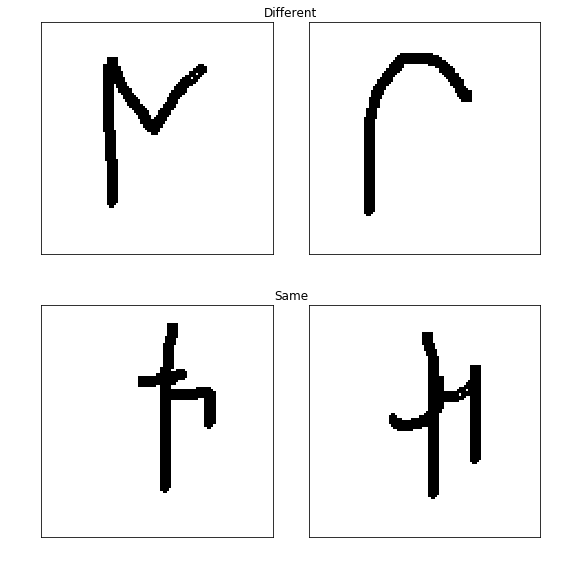

In [8]:
plot_omniglot_pairs(x, y)

In [72]:
from model import SiameseNet

In [74]:
model = SiameseNet()

num_layers = len(list(model.children()))

In [77]:
init_momentum = 5

init_lrs = [
    0.08743797256700206,
    0.006548296940024738,
    0.009556466904465523,
    0.0685581642286567,
    0.07304234902682386,
    0.06970373625639423
]

init_momentums = [init_momentum] * num_layers

end_momentums = [
    10,
    0.7522947845351178,
    0.5934778660438647,
    0.46755704543908005,
    0.6182257012824235,
    0.7892308522525984
]

In [134]:
epochs = 2

In [135]:
f = lambda max, min: (max - min) / (epochs-1)

In [136]:
rates = [
    f(x, y) for x,y in zip(end_momentums, init_momentums)
]

In [137]:
rates

[5.0,
 -4.247705215464882,
 -4.406522133956136,
 -4.53244295456092,
 -4.381774298717577,
 -4.210769147747402]

In [138]:
x = 5
for i in range(epochs):
    if i > 0:
        x += rates[0]
    print("\t{}".format(x))

	5
	10.0


In [100]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [116]:
init_lr = 1e-3
lr = init_lr
optimizer = optim.SGD(model.parameters(), lr=lr)

In [117]:
# learning rate scheduler
scheduler = StepLR(
    optimizer, step_size=1, gamma=0.5,
)

In [118]:
for i in range(epochs):
    scheduler.step()
    print(list(optimizer.param_groups)[0]['lr'])

0.001
0.0005
0.00025
0.000125
6.25e-05


In [120]:
x = 1e-3
for i in range(epochs):
    if i > 0:
        x *= 0.5
    print(x)

0.001
0.0005
0.00025
0.000125
6.25e-05
